In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 读入数据

In [2]:
def loadDataSet():
    dataMat = []
    labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

## Sigmoid 函数

In [3]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

## 梯度上升优化算法
**梯度上升伪代码：**  
每个回归系数初始化为1  
重复R次：  
&ensp;&ensp;&ensp;&ensp;计算整个数据集的梯度  
&ensp;&ensp;&ensp;&ensp;使用 alpha\*gradient 更新回归系数的向量  
返回回归系数

In [4]:
def gradAscent(dataMatIn, classLabels):
    # 将数据转换成 numpy 矩阵
    dataMatrix = np.mat(dataMatIn)    # 100*3
    labelMat = np.mat(classLabels).transpose()    # 1*100 --> 100*1
    m, n = np.shape(dataMatrix)
    alpha = 0.001    # 步长
    maxCycles = 500    # 迭代次数
    weights = np.ones((n, 1))    # n*1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)    # (100*3)*(3*1) --> 100*1
        error = (labelMat - h)    # 100*1
        weights = weights + alpha * dataMatrix.transpose() * error
    return weights

## 随机梯度上升算法
随机梯度上升算法：一次仅用一个样本点来更新回归系数  
**随机梯度上升伪代码：**  
每个回归系数初始化为1  
对数据集中每个样本：  
&ensp;&ensp;&ensp;&ensp;计算该样本的梯度  
&ensp;&ensp;&ensp;&ensp;使用 alpha\*gradient 更新回归系数的向量  
返回回归系数

In [5]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = np.shape(dataMatrix)
    alpha = 0.01
    weights = np.ones(n)    # 1*n
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

### 改进的随机梯度上升算法

In [6]:
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m, n = np.shape(dataMatrix)
    weights = np.ones(n)    # 1*n
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01    # 每次迭代调整alpha
            randIndex = int(np.random.uniform(0, len(dataIndex)))    # 随机选取样本   
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

## 画出数据集和 Logistic 回归最佳拟合直线的函数

In [7]:
def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = np.array(dataMat)
    n = np.shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

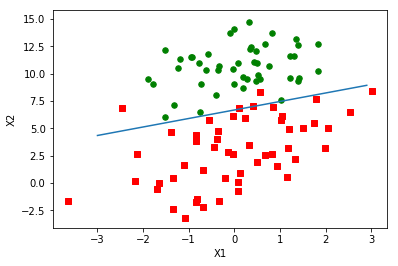

In [8]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights.getA())

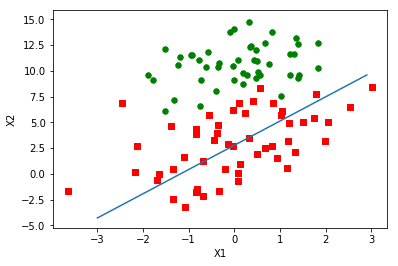

In [9]:
weights = stocGradAscent0(np.array(dataArr), labelMat)
plotBestFit(weights)

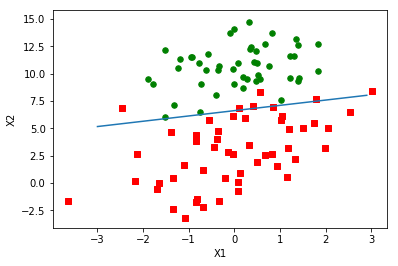

In [10]:
weights = stocGradAscent1(np.array(dataArr), labelMat)
plotBestFit(weights)